# Facebook Graph
-  Associativity: Tendency of node to be connected with noes of similar degree `nx.degree_pearson_correlation_coefficient`
-  Transitivity: Mean probability that two people with a common friend are friends themselves `nx.transitivity`
-  Average Clustering Coefficient: An alternative definition of transitivity `nx.average_clustering`
    -  Puts more weight on vertices with a low degree since they have a limited number of possible pairs of neighbours so tends to be higher than transitivity.


In [1]:
import os
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

In [2]:
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz
!wget http://snap.stanford.edu/data/facebook.tar.gz
!gzip -d facebook_combined.txt.gz
!tar -xf facebook.tar.gz

--2022-07-11 23:09:43--  http://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   216KB/s    in 1.0s    

2022-07-11 23:09:44 (216 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]

--2022-07-11 23:09:44--  http://snap.stanford.edu/data/facebook.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732104 (715K) [application/x-gzip]
Saving to: ‘facebook.tar.gz’

facebook.tar.gz     100%[===================>] 714.95K   423KB/s    in 1.7s    

2022-07-11 23:09:46 (423 KB/s) - ‘facebook.tar.gz’ saved [732

In [3]:
# take a look at the first lines of the edge list
!head facebook_combined.txt

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10


In [4]:
# load combined network; also load nodeID of 10 ego-user
G = nx.read_edgelist("facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [6]:
# Each file in the "facebook" directory is named as nodeId.format
# where nodeId is the id of an ego-user and format is the format of the file
ego_nodes = set([int(name.split('.')[0]) for name in os.listdir("facebook/")])

In [7]:
ego_nodes # neighbour of a node

{0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980}

In [8]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G)

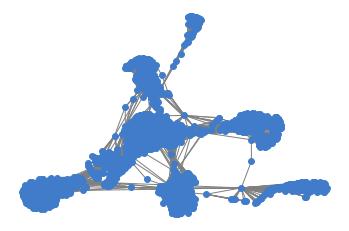

In [9]:
plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, node_color=default_node_color, edge_color=default_edge_color, with_labels=False, node_size=35)

## Community Relation - Network Analysis Time
Highly likely that friends reflect different aspects of your life. Social network analysis, we can try to automatically identify such groups, inferring from topolgical properties, or semi-automatically; exploiting some prior insight. One way is to try minimise intra-community edges (edges connecting members of different communities) while maximising inter-community edges (connecting members in same community). Can do with `community.best_partition(G)`.

Some basic analysis tells us there are well-defined communities to which nodes belong. We want to identify these communities .


In [10]:
def draw_metric(G, dct, spring_pos):
  """ draw the graph G using the layout spring_pos.
      The top 10 nodes w.r.t. values in the dictionary dct
      are enhanced in the visualization """
  top = 10
  max_nodes =  sorted(dct.items(), key = lambda v: -v[1])[:top]
  
  max_keys = [key for key,_ in max_nodes]
  max_vals = [val*300 for _, val in max_nodes]

  plt.axis("off")
  
  nx.draw_networkx(G, 
                   pos=spring_pos, 
                   cmap='Blues', 
                   edge_color=default_edge_color,
                   node_color=default_node_color, 
                   node_size=3,
                   alpha=0.4, 
                   with_labels=False)
  
  nx.draw_networkx_nodes(G, 
                         pos=spring_pos, 
                         nodelist=max_keys, 
                         node_color=enhanced_edge_color,
                         node_size=max_vals)

In [11]:
# betweenness centrality
bC = nx.betweenness_centrality(G)
np.mean(list(bC.values())) # avg is quite low; large amount of non-bridging nodes

0.0006669573568730229

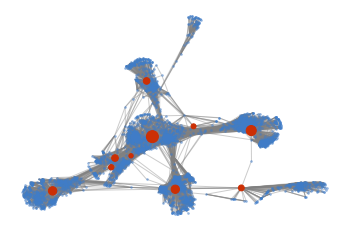

In [12]:
draw_metric(G,bC,spring_pos)

In [13]:
# global efficiency
gE = nx.global_efficiency(G)
print(gE)

0.30657814798734856


In [14]:
# average clustering
aC = nx.average_clustering(G)
print(aC)

0.6055467186200876


In [15]:
# degree centrality
deg_C = nx.degree_centrality(G)
np.mean(list(deg_C.values())) # how well nodes are connected to each other

0.010819963503439287

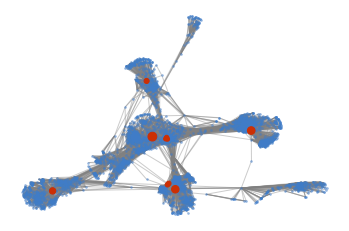

In [16]:
draw_metric(G,deg_C,spring_pos)


In [17]:
# closeness centrality
clos_C = nx.closeness_centrality(G)
np.mean(list(clos_C.values()))
# each central node is part of some community; and there are a bunch of highly interconnected nodes

0.2761677635668376

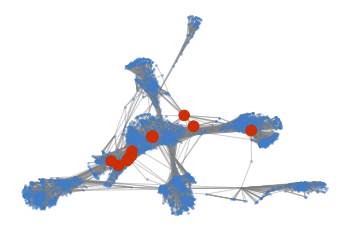

In [18]:
draw_metric(G,clos_C,spring_pos)


In [19]:
# assortativity
assortativity = nx.degree_pearson_correlation_coefficient(G)
assortativity

0.06357722918564919

In [20]:
t = nx.transitivity(G)
t

0.5191742775433075

### Community Detection

In [27]:
!pip install communities
!pip install python-louvain


     |████████████████████████████████| 204 kB 18.4 MB/s eta 0:00:01
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9395 sha256=820904ed89bac3f27faea47f91b598284267af464a705939b22e8f344360d02b
  Stored in directory: /home/jupyter/.cache/pip/wheels/f6/23/43/a714ed84811240ec3e8e709b8594ecdfbc8ad36ca5d949e38e
Successfully built python-louvain


0 is in community number 0
107 is in community number 8
3980 is in community number 12
3437 is in community number 14
686 is in community number 13
1684 is in community number 4
1912 is in community number 3
698 is in community number 13
348 is in community number 1
414 is in community number 1


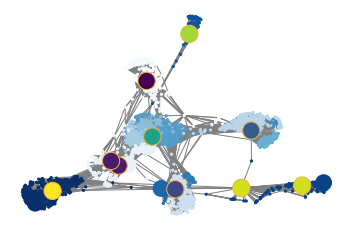

In [28]:
import community

# assign communities to nodes
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]

for node in ego_nodes:
  print(node, "is in community number", parts.get(node))
  
n_sizes = [5]*len(G.nodes())
for node in ego_nodes:
  n_sizes[node] = 250

plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, cmap=plt.get_cmap("Blues"), edge_color=default_edge_color, node_color=values, node_size=n_sizes, with_labels=False)

# enhance color and size of the ego-nodes
nodes = nx.draw_networkx_nodes(G,spring_pos,ego_nodes,node_color=[parts.get(node) for node in ego_nodes])
nodes.set_edgecolor(enhanced_node_color)

### Ego-net analysis
We can inspect the 10 sub-networks (ego-networks); here we will analyse the subnetwork of ego-user 1

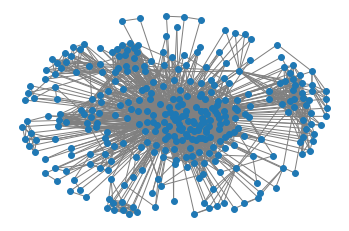

In [29]:
G0 = nx.read_edgelist("facebook/0.edges", create_using=nx.Graph(), nodetype=int)
for node in G0.copy():
  G0.add_edge(0,node)

plt.axis("off")
pos_G0 = nx.spring_layout(G0)
nx.draw_networkx(G0, pos=pos_G0, with_labels=False, node_size=35, edge_color=default_edge_color)

In [30]:
import pandas as pd
circles = {}

# nodes for each subnetwork are stored in "facebook" folder under nodeId.circles
with open("facebook/0.circles") as f_in:
  line = f_in.readline().rstrip().split("\t")
  while line and not '' in line:
    circles[line[0]] = [int(v) for v in line[1:]]
    line = f_in.readline().rstrip().split("\t")

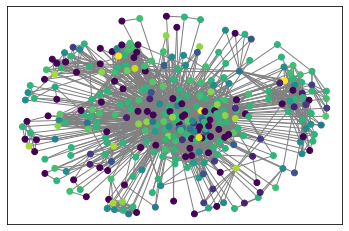

In [31]:
node_colors = [0] * G0.number_of_nodes()
count = 0
for key in circles:
  circle = circles[key]
  for node in circle:
    if node < G0.number_of_nodes():
      node_colors[node] = count
  count += 1

nx.draw_networkx(G0, pos=pos_G0, with_labels=False, node_size=35, node_color=node_colors, edge_color=default_edge_color)

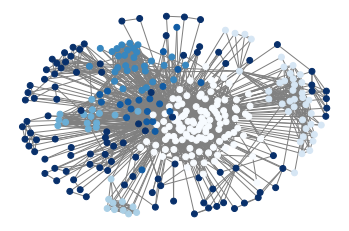

In [32]:
parts = community.best_partition(G0)
values = [parts.get(node) for node in G0.nodes()]

plt.axis("off")
nx.draw_networkx(G0, pos=pos_G0, cmap=plt.get_cmap("Blues"), edge_color=default_edge_color, node_color=values, node_size=35, with_labels=False)

In [33]:
# community found does not reflect the circles
set(parts.values())
len(circles)

24

In [34]:
# a node can be present in more than one list??
for i in circles:
  for j in circles:
    if i != j:
      for n1 in circles[i]:
        for n2 in circles[j]:
          if n1 == n2:
            print(n1, 'present in ',i,'found in', j)
            assert(False)

54 present in  circle0 found in circle11


AssertionError: 

In [35]:
#@title  
nx.average_shortest_path_length(G0)
nx.global_efficiency(G0)
nx.average_clustering(G0)

np.mean(list(nx.betweenness_centrality(G0).values()))
np.mean(list(nx.closeness_centrality(G0).values()))
np.mean(list(nx.degree_centrality(G0).values()))
nx.degree_pearson_correlation_coefficient(G)
nx.transitivity(G)

import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, nx_comm.label_propagation_communities(G))

0.7368407345343148

## Embedding for Supervised and Unsupervised tasks
We want to predict future edges. Link prediction aims at forecasting the likelihood of a future connection between two nodes (which can be solved using several ML algorithms).

We will treat link prediction as a supervised task, we will provide pairs of nodes to each algorithm as input and the target will be binary; connected if nodes are connected and not connected otherwise. We can create a train and test dataset, these are two subgraphs with the same nodes but different numbers of edges.

Perform edgeprediction task for Facebook Social Graph

#### Parse Node Features
Load features describing each node; a lot of data parsing..

In [36]:
# Adapted from https://github.com/jcatw/snap-facebook

feat_file_name = "feature_map.txt"
feature_index = {}  #numeric index to name
inverted_feature_index = {} #name to numeric index
network = nx.Graph()

def parse_featname_line(line):
  """ used to parse each line of the files containing feature names """
  line = line[(line.find(' '))+1:]  # chop first field
  split = line.split(';')
  name = ';'.join(split[:-1]) # feature name
  index = int(split[-1].split(" ")[-1]) #feature index
  return index, name

def load_features():
  """ 
  parse each ego-network and creates two dictionaries:
      - feature_index: maps numeric indices to names
      - inverted_feature_index: maps names to numeric indices
  """
  import glob
  feat_file_name = 'tmp.txt'
  # may need to build the index first
  if not os.path.exists(feat_file_name):
      feat_index = {}
      # build the index from data/*.featnames files
      featname_files = glob.iglob("facebook/*.featnames")
      for featname_file_name in featname_files:
          featname_file = open(featname_file_name, 'r')
          for line in featname_file:
              # example line:
              # 0 birthday;anonymized feature 376
              index, name = parse_featname_line(line)
              feat_index[index] = name
          featname_file.close()
      keys = feat_index.keys()
      keys = sorted(keys)
      out = open(feat_file_name,'w')
      for key in keys:
          out.write("%d %s\n" % (key, feat_index[key]))
      out.close()

  index_file = open(feat_file_name,'r')
  for line in index_file:
      split = line.strip().split(' ')
      key = int(split[0])
      val = split[1]
      feature_index[key] = val
  index_file.close()

  for key in feature_index.keys():
      val = feature_index[key]
      inverted_feature_index[val] = key

def parse_nodes(network, ego_nodes):
  """
  for each nodes in the network assign the corresponding features 
  previously loaded using the load_features function
  """
  # parse each node
  for node_id in ego_nodes:
      featname_file = open(f'facebook/{node_id}.featnames','r')
      feat_file     = open(f'facebook/{node_id}.feat','r')
      egofeat_file  = open(f'facebook/{node_id}.egofeat','r')
      edge_file     = open(f'facebook/{node_id}.edges','r')

      ego_features = [int(x) for x in egofeat_file.readline().split(' ')]

      # Add ego node features
      network.nodes[node_id]['features'] = np.zeros(len(feature_index))
      
      # parse ego node
      i = 0
      for line in featname_file:
          key, val = parse_featname_line(line)
          # Update feature value if necessary
          if ego_features[i] + 1 > network.nodes[node_id]['features'][key]:
              network.nodes[node_id]['features'][key] = ego_features[i] + 1
          i += 1

      # parse neighboring nodes
      for line in feat_file:
          featname_file.seek(0)
          split = [int(x) for x in line.split(' ')]
          node_id = split[0]
          features = split[1:]

          # Add node features
          network.nodes[node_id]['features'] = np.zeros(len(feature_index))

          i = 0
          for line in featname_file:
              key, val = parse_featname_line(line)
              # Update feature value if necessary
              if features[i] + 1 > network.nodes[node_id]['features'][key]:
                  network.nodes[node_id]['features'][key] = features[i] + 1
              i += 1
          
      featname_file.close()
      feat_file.close()
      egofeat_file.close()
      edge_file.close()

In [37]:
# parse edge features and add them to the networkx nodes
load_features()
parse_nodes(G, ego_nodes)

In [42]:
# check features has been correctly assigned
len(G.nodes), G.nodes[0], G.nodes[0]['features'].shape

(4039, {'features': array([1., 1., 1., ..., 0., 0., 0.])}, (1283,))

### Link Prediction

In [43]:
from sklearn.model_selection import train_test_split
from stellargraph.data import EdgeSplitter
from stellargraph import StellarGraph

# define a train and test set 
edgeSplitter = EdgeSplitter(G) # also returns node pairs samples(test) and binary targets (labels_test)
graph_test, samples_test, labels_test = edgeSplitter.train_test_split(p=0.1, method="global", seed=24)

# from reduced list, run same operation to obtain train
edgeSplitter = EdgeSplitter(graph_test, G) 
graph_train, samples_train, labels_train = edgeSplitter.train_test_split(p=0.1, method="global", seed=24)

** Sampled 8823 positive and 8823 negative edges. **
** Sampled 7941 positive and 7941 negative edges. **


Will be comparing three methods for predicting missing edges:
-  1: Node2Vec to learn node embeddings without supervision. Node embeddings will then be used to train Random Forest classifier in a supervised manner. Learned embedding will be used as input for supervised classification.
-  2: GraphSAGE (with and without features) will be used for link prediction. Jointly learn embedding and perform classification task.
-  3: Hand crafted features will be extracted and used to train a Random Forest Classifier

#### Node2Vec

In [45]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=d8b64c750063b0d4a7f3e31584e1a43360785b8d04c8436897ce2cc1c32dea23
  Stored in directory: /home/jupyter/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [46]:
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder
from stellargraph.data import EdgeSplitter

node2vec = Node2Vec(graph_train)
model = node2vec.fit()

# generate embedding for each pair of embedded nodes
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
train_embeddings = [edges_embs[str(x[0]), str(x[1])] for x in samples_train]

# create test set
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
test_embeddings = [edges_embs[str(x[0]), str(x[1])] for x in samples_test]

Generating walks (CPU: 1):   0%|          | 0/10 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [02:16<00:00, 13.63s/it]


In [54]:
samples_train.shape, samples_test.shape # node pairs

((15882, 2), (17646, 2))

In [51]:
len(test_embeddings), test_embeddings[0].shape

(17646, (128,))

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=10)
rf.fit(train_embeddings, labels_train)

y_pred = rf.predict(test_embeddings)
print('Precision:', metrics.precision_score(labels_test, y_pred)) 
print('Recall:', metrics.recall_score(labels_test, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred)) 

Precision: 0.9452724997155535
Recall: 0.9416298311232008
F1-Score: 0.9434476493300022


Not bad at all. We observe that node2vec already provides a powerful representation for predicting links on combined Facebook Ego Network.

#### GraphSAGE
Two-layer GraphSAGE that given labeled pairs of nodes, outputs a pair of node embeddings. Then a fully connected NN can process these embeddings and produce link predictions. GraphSAGE and FCNN will be concatenated to be able to train E2E so that embeddings learning stage is influenced by predictions.

**Featureless Approach**: Not consider available node features at the moment. A common approach is to assign each node a one-hot feature vector of length $|V|$ (number of nodes in the graph), where only the cell corresponding to the node is 1 and the rest is 0. We do this in Python as follows:

In [56]:
# eye: Creates 2d array with 1's on diagonal and m everywhere
# identity matrix of size |V|
eye = np.eye(graph_train.number_of_nodes()) 
print(eye.shape)
fake_features = {n: eye[n] for n in G.nodes()} # python dict to assign as attribute
nx.set_node_attributes(graph_train, fake_features, "fake")

eye = np.eye(graph_test.number_of_nodes())
fake_features = {n: eye[n] for n in G.nodes()}
nx.set_node_attributes(graph_test, fake_features, "fake")

(4039, 4039)


In [57]:
graph_train.nodes[0]

{'features': array([1., 1., 1., ..., 0., 0., 0.]),
 'fake': array([1., 0., 0., ..., 0., 0., 0.])}

In [58]:
from stellargraph.mapper import GraphSAGELinkGenerator

# generator to feed model; use StellarGraph GraphSageLinkGenerator; will provide model with pairs of nodes as input
batch_size = 64 # num inputs per minibatch
num_samples = [4, 4] # num of first and second-hop neighbour samples that GraphSAGE considers

# convert to graph train and test for stellargraph
sg_graph_train = StellarGraph.from_networkx(graph_train, node_features="fake")
sg_graph_test = StellarGraph.from_networkx(graph_test, node_features="fake")

# create traingen and trainflow
train_gen = GraphSAGELinkGenerator(sg_graph_train, batch_size, num_samples)
train_flow = train_gen.flow(samples_train, labels_train, shuffle=True, seed=24)

test_gen = GraphSAGELinkGenerator(sg_graph_test, batch_size, num_samples)
test_flow = test_gen.flow(samples_test, labels_test, seed=24)

In [61]:
from stellargraph.layer import GraphSAGE, link_classification
from tensorflow import keras

# create our model
layer_sizes = [20, 20] # two hidden layers of size 20
# GraphSage with bias and dropout also to reduce overfitting
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.3
)
x_inp, x_out = graphsage.in_out_tensors()

# concat output with link_classification; takes pairs of node embeddings
# uses binary operators (inner-product here - ip) to produce edge embeddings
# and passes through FCNN for classification
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

model = keras.Model(inputs=x_inp, outputs=prediction)

# Adam optimizer and MSE as loss function
model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.mse,
    metrics=["acc"]
)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [62]:
epochs=10
history = model.fit(train_flow, epochs=epochs, validation_data=test_flow)

Epoch 1/10
249/249 [==============================] - 301s 1s/step - loss: 0.2347 - acc: 0.5969 - val_loss: 0.1931 - val_acc: 0.7292
Epoch 2/10
249/249 [==============================] - 299s 1s/step - loss: 0.1940 - acc: 0.7310 - val_loss: 0.1824 - val_acc: 0.7459
Epoch 3/10
249/249 [==============================] - 298s 1s/step - loss: 0.1837 - acc: 0.7527 - val_loss: 0.1785 - val_acc: 0.7522
Epoch 4/10
249/249 [==============================] - 300s 1s/step - loss: 0.1783 - acc: 0.7643 - val_loss: 0.1752 - val_acc: 0.7686
Epoch 5/10
249/249 [==============================] - 303s 1s/step - loss: 0.1737 - acc: 0.7833 - val_loss: 0.1748 - val_acc: 0.7765
Epoch 6/10
249/249 [==============================] - 300s 1s/step - loss: 0.1729 - acc: 0.7882 - val_loss: 0.1738 - val_acc: 0.7816
Epoch 7/10
249/249 [==============================] - 301s 1s/step - loss: 0.1715 - acc: 0.7922 - val_loss: 0.1740 - val_acc: 0.7874
Epoch 8/10
249/249 [==============================] - 301s 1s/step - 

In [63]:
from sklearn import metrics 
y_pred = np.round(model.predict(train_flow)).flatten()
print('Precision:', metrics.precision_score(labels_train, y_pred)) 
print('Recall:', metrics.recall_score(labels_train, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_train, y_pred)) 

Precision: 0.5023998523167805
Recall: 0.685430046593628
F1-Score: 0.5798135818908123


In [64]:
y_pred = np.round(model.predict(test_flow)).flatten()
print('Precision:', metrics.precision_score(labels_test, y_pred)) 
print('Recall:', metrics.recall_score(labels_test, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred)) 

Precision: 0.7080067867819342
Recall: 0.9931995919755185
F1-Score: 0.8266981132075472


Results are lower than node2vec. However, we have not considered real node features yet which can represent a lot of information. We can do that now.

#### Introducing Node Features

In [65]:
sg_graph_train = StellarGraph.from_networkx(graph_train, node_features="features") # includes feature inputs
sg_graph_test = StellarGraph.from_networkx(graph_test, node_features="features") # has features for each node

train_gen = GraphSAGELinkGenerator(sg_graph_train, batch_size, num_samples)
train_flow = train_gen.flow(samples_train, labels_train, shuffle=True, seed=24)

test_gen = GraphSAGELinkGenerator(sg_graph_test, batch_size, num_samples)
test_flow = test_gen.flow(samples_test, labels_test, seed=24)

In [66]:
layer_sizes = [20, 20]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True, dropout=0.3
)

x_inp, x_out = graphsage.in_out_tensors()

prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.mse,
    metrics=["acc"],
)

epochs = 10
history = model.fit(train_flow, epochs=epochs, validation_data=test_flow)

link_classification: using 'ip' method to combine node embeddings into edge embeddings
Epoch 1/10
249/249 [==============================] - 192s 771ms/step - loss: 0.1799 - acc: 0.7976 - val_loss: 0.1674 - val_acc: 0.8506
Epoch 2/10
249/249 [==============================] - 192s 770ms/step - loss: 0.1714 - acc: 0.8432 - val_loss: 0.1668 - val_acc: 0.8575
Epoch 3/10
249/249 [==============================] - 188s 754ms/step - loss: 0.1691 - acc: 0.8567 - val_loss: 0.1664 - val_acc: 0.8599
Epoch 4/10
249/249 [==============================] - 192s 770ms/step - loss: 0.1677 - acc: 0.8575 - val_loss: 0.1665 - val_acc: 0.8607
Epoch 5/10
249/249 [==============================] - 194s 779ms/step - loss: 0.1669 - acc: 0.8620 - val_loss: 0.1664 - val_acc: 0.8623
Epoch 6/10
249/249 [==============================] - 190s 765ms/step - loss: 0.1661 - acc: 0.8570 - val_loss: 0.1667 - val_acc: 0.8461
Epoch 7/10
249/249 [==============================] - 191s 769ms/step - loss: 0.1661 - acc: 0.854

In [67]:
from sklearn import metrics 
y_pred = np.round(model.predict(train_flow)).flatten()
print('Precision:', metrics.precision_score(labels_train, y_pred)) 
print('Recall:', metrics.recall_score(labels_train, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_train, y_pred)) 

Precision: 0.5026561090508169
Recall: 0.6315325525752424
F1-Score: 0.5597722960151804


In [68]:
y_pred = np.round(model.predict(test_flow)).flatten()
print('Precision:', metrics.precision_score(labels_test, y_pred)) 
print('Recall:', metrics.recall_score(labels_test, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred)) 

Precision: 0.7834445927903871
Recall: 0.9976198571914315
F1-Score: 0.877654801076877


See that introducing real node features brings a good improvement, though the best is still node2vec.

### Hand-Crafted Features for Link Prediction
Shallow embedding approach with hand-crafted features to train a supervised classifier.

So we have four metrics for a pair of nodes $(u, v)$:
-  **Shortest path**: Length of shortest path between u and v. If u and v are directly connected through an edge, the edge will be removed before computing the shortest path. Value is 0 if u is not reachable from v.
-  **Jaccard Coefficient**: Intersection over union of set of neighbours of u and v.
-  **u centrality**: Degree centrality computed for node u
-  **v centrality**: Degree centrality computed for node v
-  **u community**: Community ID assigned to node u using Louvain heuristic
-  **v community**: Community ID assigned to node v using Louvain heuristic


In [69]:
import community

def get_shortest_path(G,u,v):
  """ return the shortest path length between u,v 
      in the graph without the edge (u,v) """
  removed = False
  if G.has_edge(u,v):
    removed = True
    G.remove_edge(u,v) # temporary remove edge
  
  try:
    sp = len(nx.shortest_path(G, u, v))
  except:
    sp = 0

  if removed:
    G.add_edge(u,v) # add back the edge if it was removed

  return sp

In [80]:
def get_hc_features(G, samples_edges, labels):
  # precompute metrics
  centralities = nx.degree_centrality(G)
  parts = community.best_partition(G)
  
  feats = []
  for (u,v),l in zip(samples_edges, labels):
    shortest_path = get_shortest_path(G, u, v)
    j_coefficient = next(nx.jaccard_coefficient(G, ebunch=[(u, v)]))[-1]
    u_centrality = centralities[u]
    v_centrality = centralities[v]
    u_community = parts.get(u)
    v_community = parts.get(v)
    # add the feature vector
    feats += [[shortest_path, j_coefficient, u_centrality, v_centrality, u_community, v_community]]
  return feats

In [81]:
# compute features for each edge in train and test set
feat_train = get_hc_features(graph_train, samples_train, labels_train)
feat_test = get_hc_features(graph_test, samples_test, labels_test)

In [82]:
len(feat_train), len(feat_train[0]), feat_train[0]

(15882,
 6,
 [3, 0.08888888888888889, 0.017087667161961365, 0.007181773155027241, 11, 11])

In [79]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

# again, train a RF classifier
rf = RandomForestClassifier(n_estimators=10) 
rf.fit(feat_train, labels_train); 

# predict and compute metrics
y_pred = rf.predict(feat_test) 
print('Precision:', metrics.precision_score(labels_test, y_pred)) 
print('Recall:', metrics.recall_score(labels_test, y_pred)) 
print('F1-Score:', metrics.f1_score(labels_test, y_pred))

Precision: 0.962565649793273
Recall: 0.9763119120480562
F1-Score: 0.9693900517668242


Hand-crafted performs better than others.

### Summary:
-  Node2Vec has unsupervised embedding with no node features
-  GraphSage has supervised embeddings with node features, also node features
-  There are also shallow manual embeddings with no node features perform really well

High results of node2vec may be because of the ego network structure. Because of high sub-modularity of the network, predicting whether two users are connected or not may be highly related to the way two candidate nodes are connected inside the network. So a situation where two users are connected to another user are also highly likely to be connected themselves; but if belong to different ego-networks or are far from each other are likely to not be connected, making the prediction easier. This is confirmed by the high results achieved using thes shallow method.

For GraphSage, we may have two users that share similar features/interests so are similar, but may belong to different ego networks so are not connected. Or possible that Graph is predicting more into the future. Ego network is timestamp of particular situation in given period.

Must interpret results with care; also note that each algorithm was not tuned and results can vary with such tuning.

Overall we see how future connections can be predicted on SNAP Facebook combined ego network and reviewed concepts to collect insight on social graph. Performing link prediction, evaluating performance to try to give them interpretations.